In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup, run_box_NObreakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
NUMBA_DISABLE_JIT = 1

from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, ExponFrag, AlwaysN, SometimesN
from PySDM.physics.constants import si
import PySDM.physics.constants as const
from PySDM.physics.trivia import Trivia

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9905284e+05 1.9100000e+00 9.9905284e+05 0.0000000e+00]
 [9.3226000e+02 0.0000000e+00 9.3226000e+02 0.0000000e+00]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.18583201e+06 0.00000000e+00 1.12456480e+06 6.01920700e+04]
 [7.11108000e+03 0.00000000e+00 6.73861000e+03 3.28730000e+02]]
finished Ec=0.9
[[      0.         0.         0.         0.  ]
 [1412391.43       0.   1271818.83  137837.19]
 [ 861479.06       0.    777517.17   25882.39]]
finished Ec=0.8
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.44754260e+08 0.00000000e+00 4.45748864e+08 3.56449845e+07]
 [1.52499848e+13 0.00000000e+00 1.21340037e+13 2.05302479e+12]]
finished Berry
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.09698256e+06 0.00000000e+00 1.06475536e+06 3.20882300e+04]
 [1.36884000e+03 0.00000000e+00 1.35959000e+03 8.28000000e+00]]


Text(0.5, 1.0, 'Geometric Kernel, n$_f$ = 4, t = 200sec')

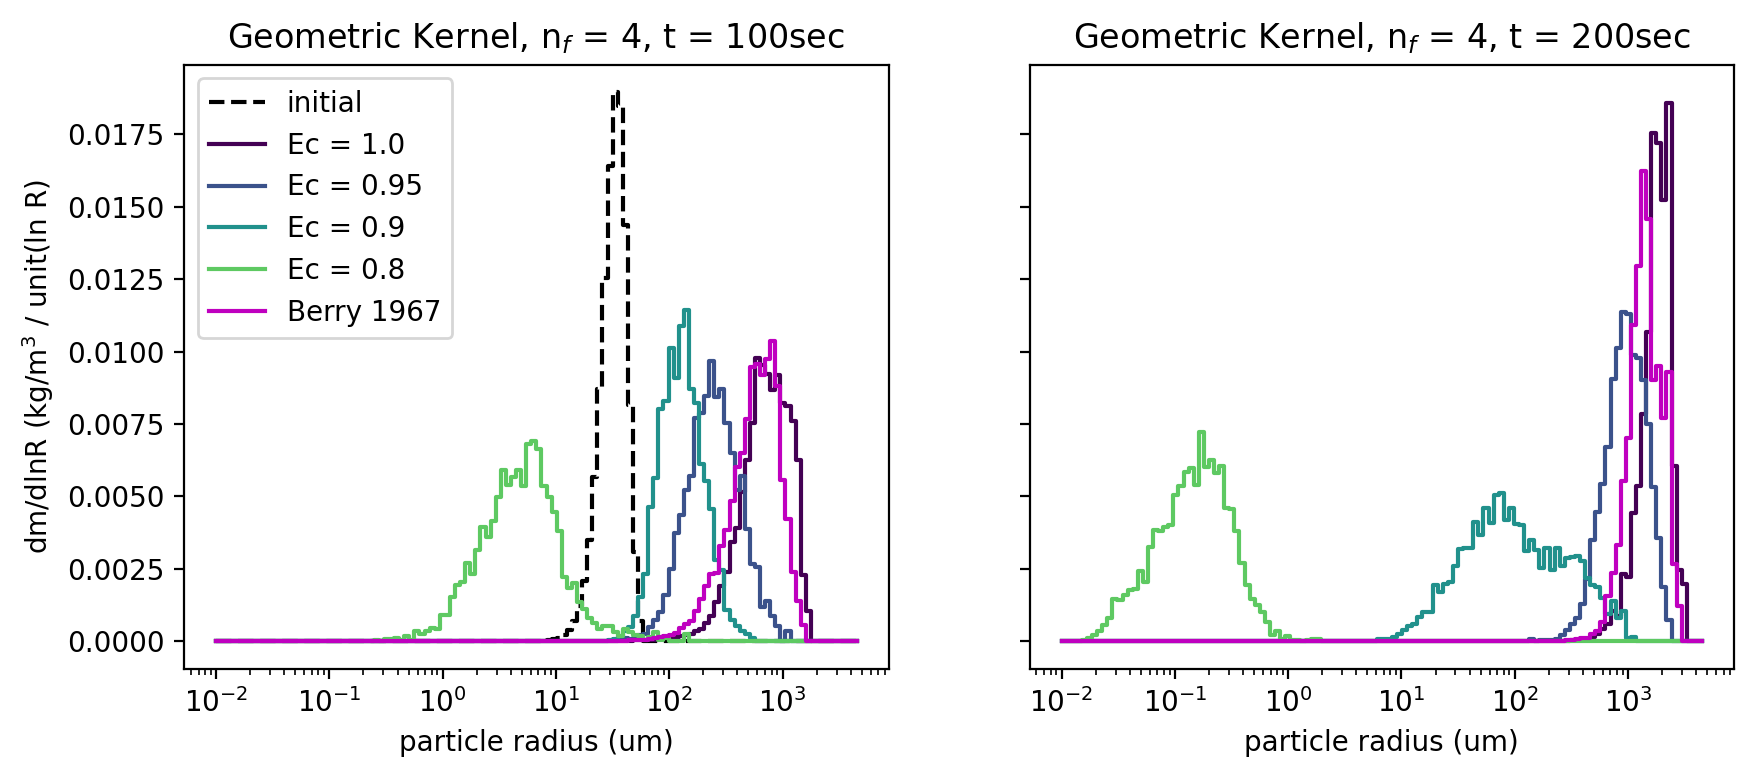

In [3]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
import numpy as np

settings = Settings0D()

rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings.fragmentation = AlwaysN(n=4, vmin=vmin)

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9, 0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("Geometric Kernel, n$_f$ = 4, t = 100sec")
ax[1].set_title("Geometric Kernel, n$_f$ = 4, t = 200sec")
#pyplot.savefig('figures/geometric_Ec_sensitivity.png')

finished Ec=1.0
[[     0.              0.              0.              0.        ]
 [411098.04583333      0.         411098.04583333      0.        ]
 [  9886.99166667      0.           9886.99166667      0.        ]]
finished Ec=0.95
[[     0.              0.              0.              0.        ]
 [479107.72916667      0.         454942.25416667  24104.52083333]
 [ 23610.29166667      0.          22443.95         1134.325     ]]
finished Ec=0.9
[[     0.              0.              0.              0.        ]
 [567196.90833333      0.         510266.75833333  56839.29583333]
 [ 50202.15833333      0.          45149.38333333   5032.44166667]]
finished Ec=0.8
[[     0.              0.              0.              0.        ]
 [870216.90416667      0.         692740.47083333 177393.46666667]
 [256247.78333333      0.         204144.69166667  51954.4       ]]
finished Berry
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.75595058e+05 0.00000000e+00 5.19791237e+05 5.

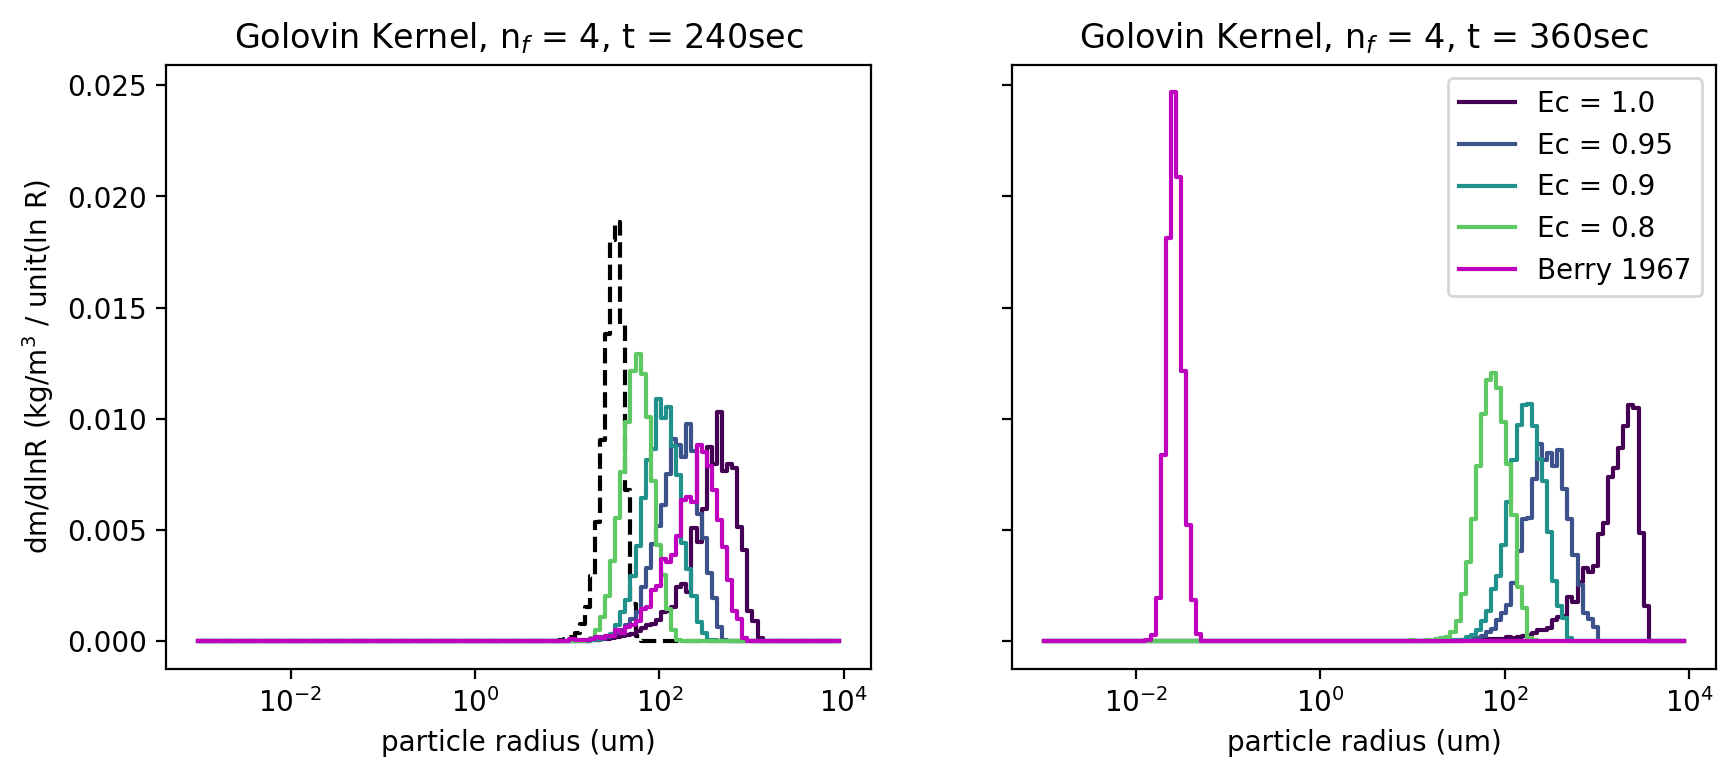

In [13]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.collision_kernels import Golovin
import numpy as np

settings = Settings0D()

settings.fragmentation = AlwaysN(n=4)
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.001 * si.um), np.log10(10000 * si.um), num=128, endpoint=True
        )
settings.kernel = Golovin(b = 1500 / si.s)

settings.warn_overflows = False
t_steps = [0, 240, 360]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9,]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[0].set_title("Golovin Kernel, n$_f$ = 4, t = " + str(t_steps[1]) + "sec")
ax[1].set_title("Golovin Kernel, n$_f$ = 4, t = " + str(t_steps[2]) + "sec")
pyplot.savefig('figures/golovin_Ec_sensitivity.png')

finished Ec=1.0
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.31970808e+05 0.00000000e+00 8.31970808e+05 0.00000000e+00]
 [4.45108333e+02 0.00000000e+00 4.45108333e+02 0.00000000e+00]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.76353417e+05 3.68750833e+03 9.27608458e+05 4.73558000e+04]
 [6.42470833e+02 0.00000000e+00 6.08887500e+02 3.35833333e+01]]
finished Ec=0.9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.18002978e+06 1.19780417e+04 1.06224752e+06 1.11412333e+05]
 [9.56304167e+02 0.00000000e+00 8.58562500e+02 9.77416667e+01]]
finished Ec=0.8
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.08336972e+09 3.62448272e+09 8.51770438e+08 1.41975309e+07]
 [6.40834780e+08 4.74107305e+09 5.19715471e+08 1.42535845e+07]]
finished Berry
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.52481416e+15  1.20678128e+16  5.68081227e+06  5.63354543e+14]
 [ 3.72661981e+16 -5.92277

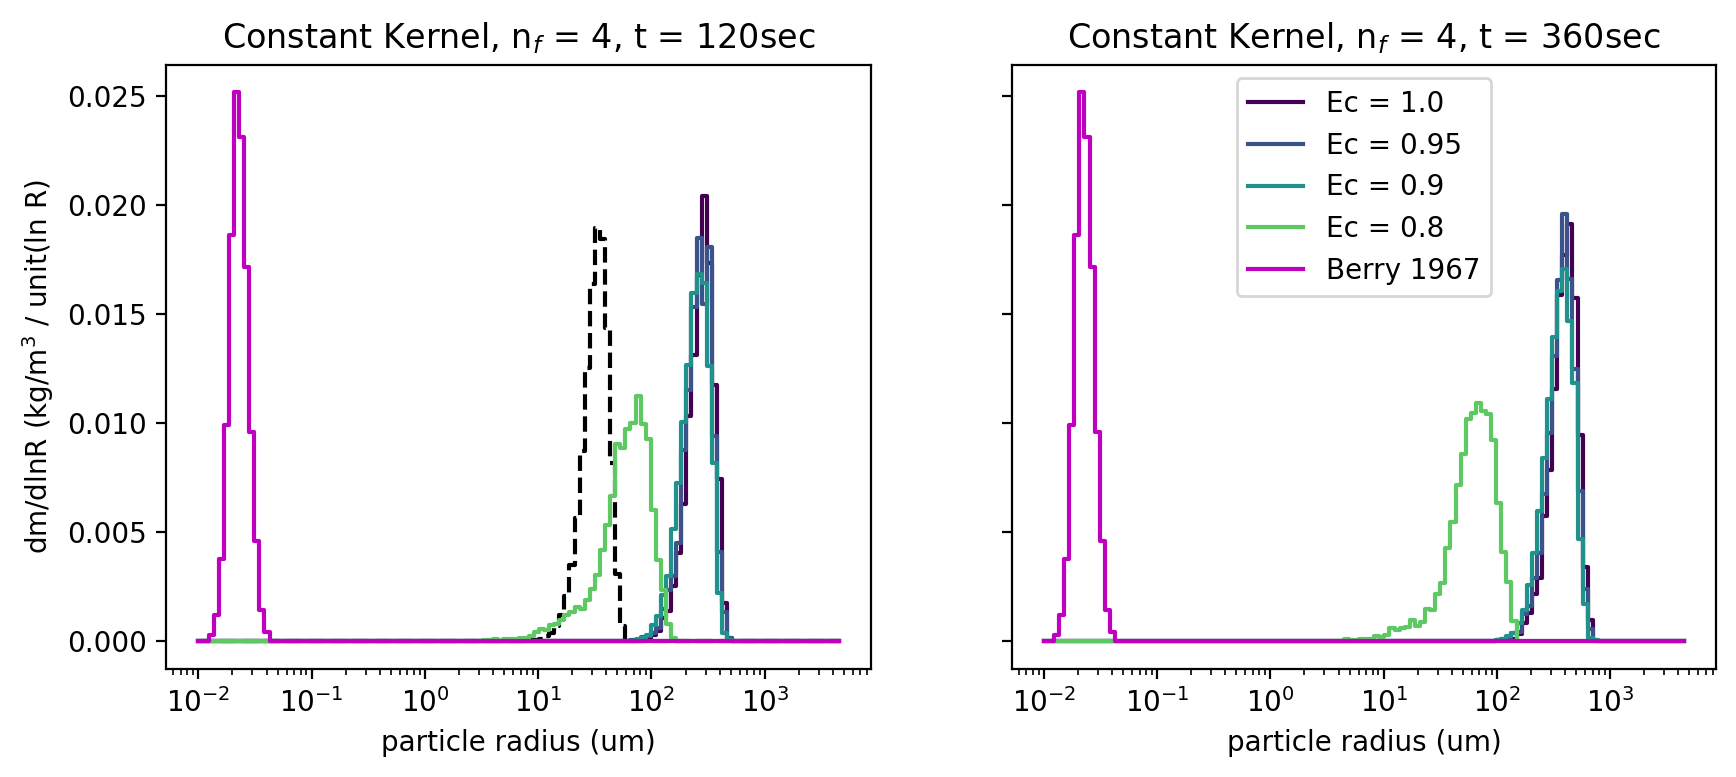

In [14]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.collision_kernels import ConstantK
import numpy as np

settings = Settings0D()

settings.fragmentation = AlwaysN(n=4)
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
settings.kernel = ConstantK(a = 1e-1 * si.cm**3 / si.s)

settings.warn_overflows = False
t_steps = [0, 120, 360]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9, 0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[0].set_title("Constant Kernel, n$_f$ = 4, t = " + str(t_steps[1]) + "sec")
ax[1].set_title("Constant Kernel, n$_f$ = 4, t = " + str(t_steps[2]) + "sec")
pyplot.savefig('figures/constantK_Ec_sensitivity.png')

## Sensitivity to n_f

finished nf=1
[[      0.         0.         0.         0.  ]
 [1104744.91       0.    997980.1        0.  ]
 [   2217.26       0.      1995.87       0.  ]]
finished nf=4
[[      0.         0.         0.         0.  ]
 [1414121.48       0.   1273649.95  138246.1 ]
 [ 562524.77       0.    507453.34    9984.74]]
finished nf=5
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.46393977e+06 0.00000000e+00 2.24766230e+06 1.67804620e+05]
 [2.20039813e+13 0.00000000e+00 1.99562378e+13 8.43200380e+11]]
finished nf=6
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.61350858e+10 0.00000000e+00 1.51542906e+10 1.07899245e+08]
 [2.43765907e+14 0.00000000e+00 2.20607247e+14 1.50432328e+13]]


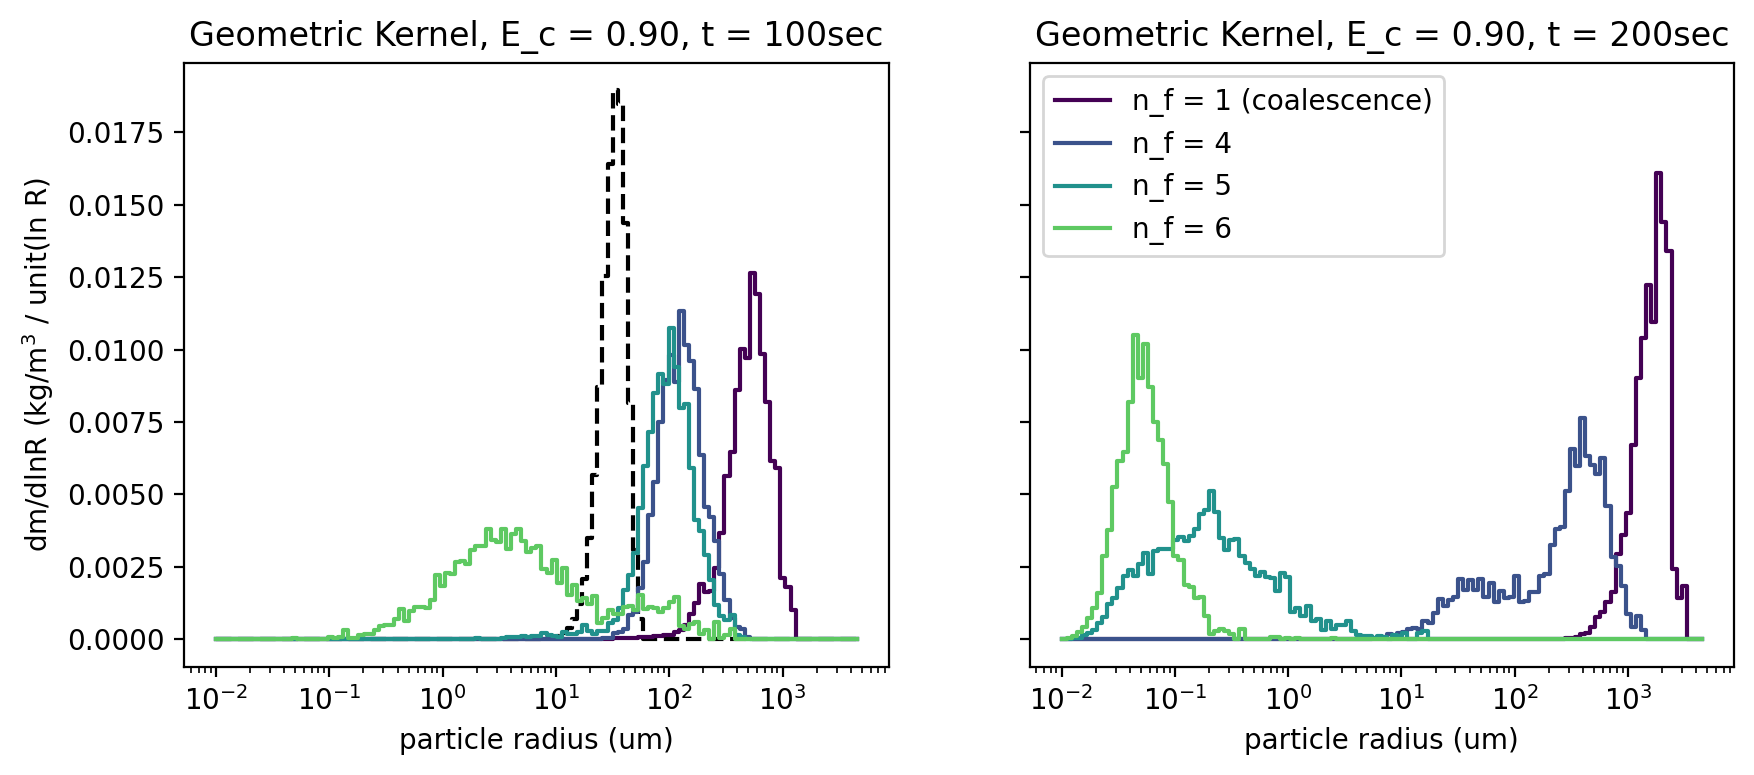

In [20]:
settings = Settings0D()

settings.coal_eff = ConstEc(Ec=0.9)
#settings.coal_eff = Berry1967()
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

nf_vals = [1, 4, 5, 6]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#pyplot.plot(x[0],y[0,0]*settings.rho, color='k', label='final')

for (i, nf) in enumerate(nf_vals):
    settings.fragmentation = AlwaysN(n=nf)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += ' (coalescence)'
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[0].set_title("Geometric Kernel, E_c = 0.90, t = " + str(t_steps[1]) + "sec")
ax[1].set_title("Geometric Kernel, E_c = 0.90, t = " + str(t_steps[2]) + "sec")

#pyplot.savefig('geometric_nf_sensitivity_berry.png')
pyplot.savefig('geometric_nf_sensitivity.png')

## Sensitivity to n_f distribution parameters

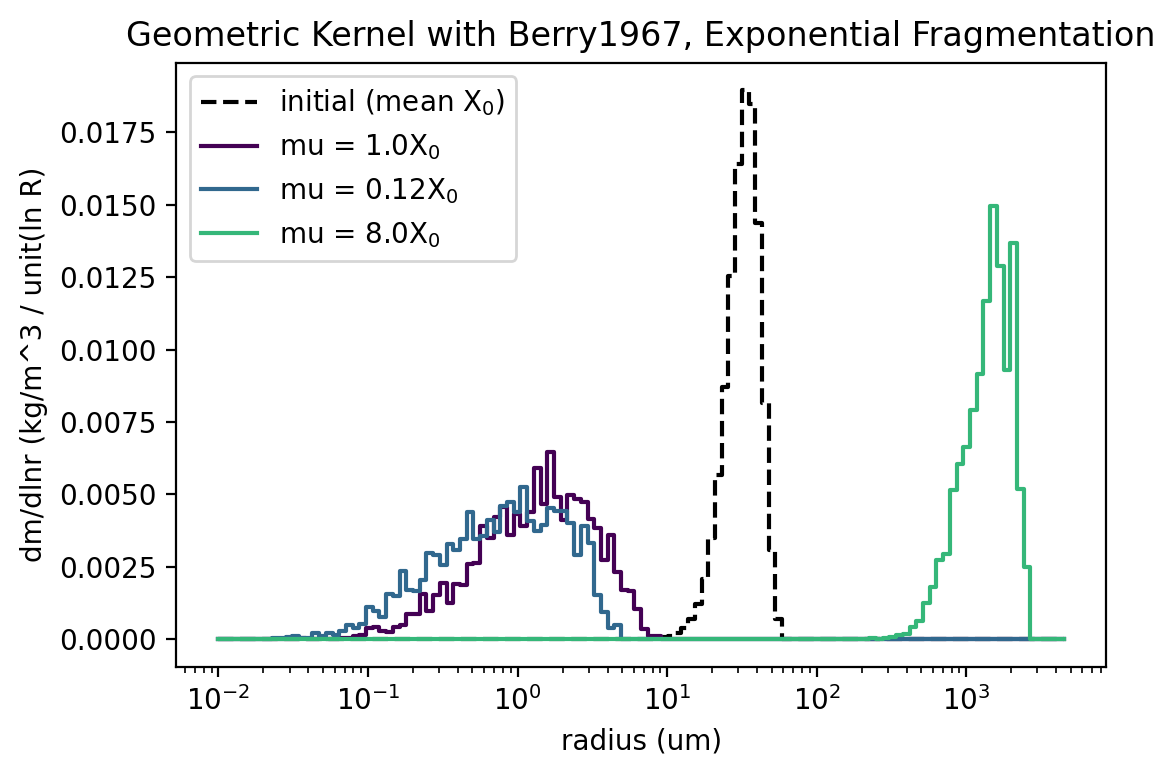

In [32]:
from PySDM.physics.constants import si

settings = Settings0D()
t_steps = [0, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
X0 = settings.X0
mu_vals = [X0, X0/8, 8*X0]
sigma = X0 / 4
vmin = X0 * 1e-3
nfmax = 10
Ec = 0.90
#settings.coal_eff=ConstEc(Ec=Ec)
settings.coal_eff=Berry1967()

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial (mean X$_0$)')

for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = ExponFrag(scale=mu, vmin=vmin, nfmax=nfmax)
    (x,y, rates) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'mu = ' + str(round(mu/X0,2)) + 'X$_0$'
        pyplot.step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlim([1.0, 1000.0])
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.title("Geometric Kernel with Berry1967, Exponential Fragmentation")
pyplot.savefig('figures/exp_mu_sensitivity.png')


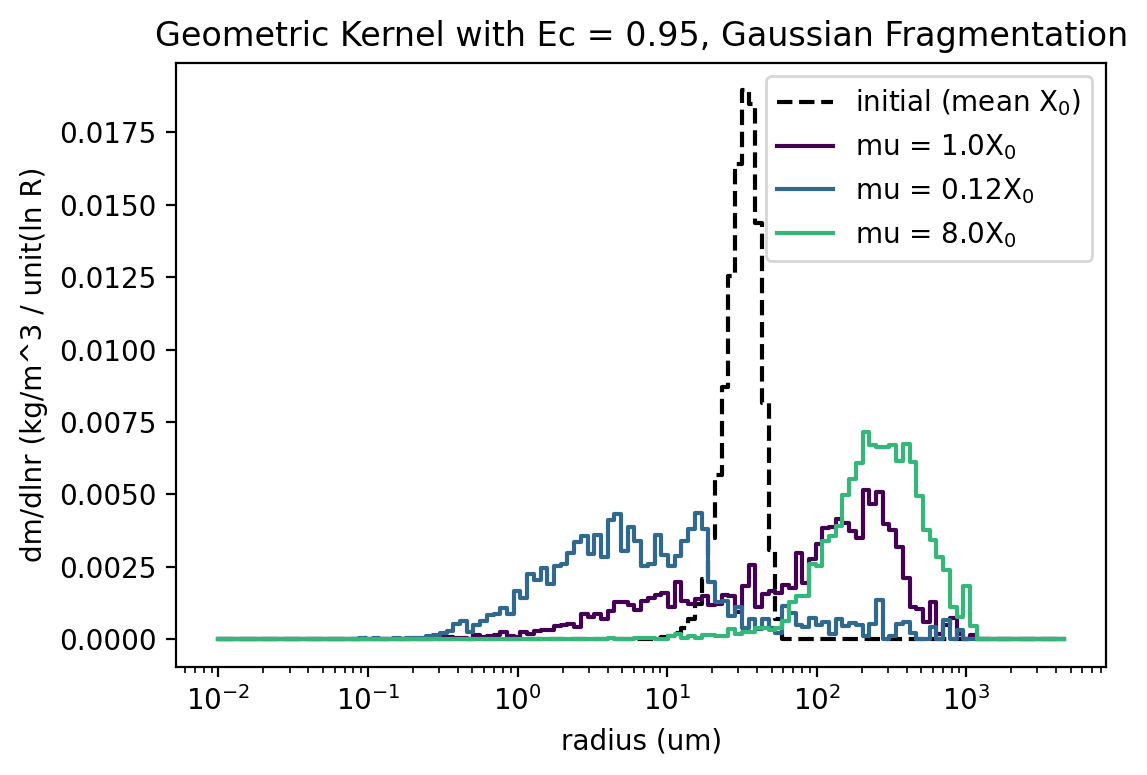

In [45]:
from PySDM.dynamics.collisions.breakup_fragmentations import ExponFrag, Gaussian
from PySDM.physics.constants import si

settings = Settings0D()
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
X0 = settings.X0
mu_vals = [X0, X0/8, 8*X0]
sigma = X0 / 4
vmin = X0 * 1e-3
nfmax = 10
Ec = 0.95
settings.coal_eff=ConstEc(Ec=Ec)
#settings.coal_eff=Berry1967()

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial (mean X$_0$)')

for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = Gaussian(mu=mu, sigma=mu/2.5, vmin=vmin, nfmax=nfmax)
    (x,y, rates) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'mu = ' + str(round(mu/X0,2)) + 'X$_0$'
        pyplot.step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.title("Geometric Kernel with Ec = 0.95, Gaussian Fragmentation")
pyplot.savefig('figures/gaussian_mu_sensitivity.png')
#pyplot.title("Geometric Kernel with Berry 1967 Efficiency, Gaussian Fragmentation")
#pyplot.savefig('figures/gaussian_mu_sensitivity_berry.png')


## Sometimes_N Fragmentation

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py (512)

File "../../../PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py", line 512:
    def __sometimes_n_body(*, n_fragment, nf, prob_n, else_n, rand):
        for i in numba.prange(len(n_fragment)):
        ^

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'PySDM.backends.impl_common.pairwise_storage.make_PairwiseStorage.<locals>.PairwiseStorage'>
- argument 4: Cannot determine Numba type of <class 'PySDM.backends.impl_numba.storage.Storage'>


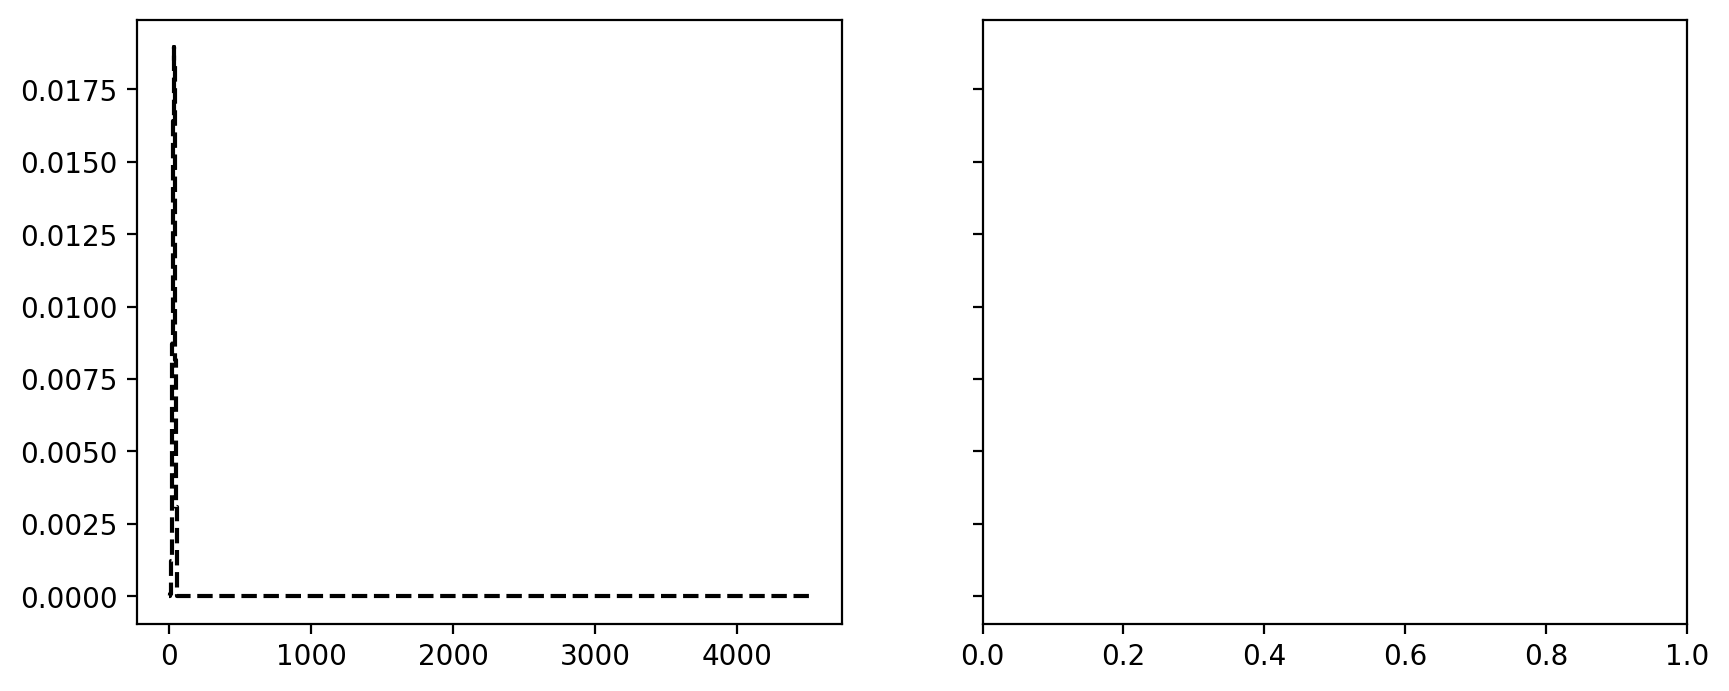

In [6]:
import numpy as np
from PySDM.dynamics.collisions.breakup_fragmentations import SometimesN

settings = Settings0D()

rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings.fragmentation = SometimesN(n=4, prob_n=0.3)

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("Geometric Kernel, n$_f$ = 4, t = 100sec")
ax[1].set_title("Geometric Kernel, n$_f$ = 4, t = 200sec")
#pyplot.savefig('figures/geometric_Ec_sensitivity.png')